In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
sns.set_style('whitegrid')

In [2]:
filtered_06 = pd.read_csv('Filtered_Merged_06.csv')
filtered_07 = pd.read_csv('Filtered_Merged_07.csv')
filtered_08 = pd.read_csv('Filtered_Merged_08.csv')
filtered_09 = pd.read_csv('Filtered_Merged_09.csv')
filtered_10 = pd.read_csv('Filtered_Merged_10.csv')

In [3]:
filtered_all = pd.concat([filtered_06, filtered_07,filtered_08,filtered_09,filtered_10])

In [4]:
filtered_all['curv_rad_binary'] = np.where(filtered_all['curv_rad']!= 0, 'Curve', 'No Curve')

In [5]:
filtered_all['curv_rad_binary'].value_counts()

No Curve    812185
Curve        17062
Name: curv_rad_binary, dtype: int64

In [9]:
filtered_all['med_type_binary'] = np.where(filtered_all['med_type']!= 0, 'Median', 'No Median')

In [14]:
def categorize_surface_type(df):
    if df['surf_typ'] in [300, 400, 410, 500, 550]:
        return "Flexible"
    elif df['surf_typ'] in [600, 610, 620, 630, 640, 650, 700, 710, 720, 730, 740, 800]:
        return "Rigid"
    else:
        return "Other"

In [18]:
filtered_all['surf_cat'] = filtered_all.apply(categorize_surface_type, axis = 1)

In [16]:
filtered_all['surf_cat'].value_counts()

Rigid       755532
Other        39467
Flexible     34248
Name: Surface_Category, dtype: int64

In [20]:
filtered_all[['no_lanes', 'lanewid', 'aadt','seg_lng','access','oneway','spd_limt','med_type_binary',
              'surf_cat','rururb','rodwycls','curv_rad_binary','Year']]

,no_lanes,lanewid,aadt,seg_lng,access,oneway,spd_limt,med_type_binary,surf_cat,rururb,rodwycls,curv_rad_binary,Year
0,2,12,8600,0.01,0,1,45,No Median,Rigid,2,99,No Curve,6
1,2,12,8600,0.12,0,1,45,No Median,Rigid,2,99,No Curve,6
2,2,12,8600,0.03,0,1,45,No Median,Rigid,2,99,No Curve,6
3,2,12,8600,0.02,0,1,45,No Median,Rigid,2,99,No Curve,6
4,2,18,8600,0.03,0,1,45,No Median,Rigid,2,99,No Curve,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174260,4,12,25000,0.26,2,2,65,Median,Rigid,1,6,No Curve,10
174261,4,12,25000,0.29,2,2,65,Median,Rigid,1,6,No Curve,10
174262,4,12,25000,0.65,2,2,65,Median,Rigid,1,6,No Curve,10
174263,4,12,25000,0.97,2,2,65,Median,Rigid,1,6,No Curve,10


In [21]:
var_considered = ['no_lanes', 'lanewid', 'aadt','seg_lng','access','oneway','spd_limt','med_type_binary',
              'surf_cat','rururb','rodwycls','curv_rad_binary','Year']

In [22]:
filtered_all.to_csv('AllData_Filtered_Merged_ConsolidatedCategories.csv')

Index(['medwid', 'no_lanes', 'lanewid', 'aadt', 'trf_cntl', 'curv_rad',
       'begmp', 'seg_lng', 'endmp', 'access', 'oneway', 'spd_limt', 'med_type',
       'surf_typ', 'cnty_rte', 'rururb', 'rodwycls', 'AccCount',
       'Severity_PDO', 'Severity_Inj_TypeA', 'Severity_Inj_TypeB',
       'Severity_Inj_TypeC', 'Severity_Fatal', 'Severity_Unknown',
       'Weather_Clear', 'Weather_Rain', 'Weather_Snow', 'Weather_Fog',
       'Weather_Hail', 'Weather_CrossWind', 'Weather_Other', 'Weather_Unknown',
       'Year', 'curv_rad_binary', 'med_type_binary', 'Surface_Category',
       'surf_cat'],
      dtype='object')

In [59]:
def cumfreq(a, numbins=10, defaultreallimits=None):
    # docstring omitted
    h,l,b,e = histogram(a,numbins,defaultreallimits)
    cumhist = np.cumsum(h*1, axis=0)
    return cumhist,l,b,e

/Users/jacob/anaconda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


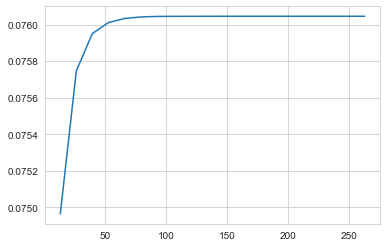

In [63]:
a = np.array(filtered_all['AccCount'])
num_bins = 20
counts, bin_edges = np.histogram(a, bins=num_bins, normed=True)
cdf = np.cumsum(counts)
pylab.plot(bin_edges[1:], cdf)
